# Diabetes Prediction using Machine Learning

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


# Reading Dataset

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.head

<bound method NDFrame.head of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.

In [4]:
df.shape

(100000, 9)

# Checking null values

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Checking Duplicate Values

In [6]:
df.duplicated().sum()

3854

In [7]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Encoding

In [8]:
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


In [9]:
#dropping no info values
df = df[df['smoking_history'] != 'No Info']
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [10]:
#merging 2 columns that meant the same
df['smoking_history'] = df['smoking_history'].replace('former', 'not current')
df

C:\Users\acer\AppData\Local\Temp\ipykernel_12676\47022349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].replace('former', 'not current')


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,not current,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [11]:
df['smoking_history'] = df['smoking_history'].replace('ever', 'current')
df

C:\Users\acer\AppData\Local\Temp\ipykernel_12676\1699961568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].replace('ever', 'current')


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,not current,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['smoking_history'] = le.fit_transform(df['smoking_history'])
df.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_12676\3405366385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = le.fit_transform(df['smoking_history'])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,1,25.19,6.6,140,0
2,Male,28.0,0,0,1,27.32,5.7,158,0
3,Female,36.0,0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,0,20.14,4.8,155,0
5,Female,20.0,0,0,1,27.32,6.6,85,0


In [13]:
df['gender'] = le.fit_transform(df['gender'])
df

C:\Users\acer\AppData\Local\Temp\ipykernel_12676\1401090885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = le.fit_transform(df['gender'])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,1,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,0,26.0,0,0,1,34.34,6.5,160,0
99993,0,40.0,0,0,1,40.69,3.5,155,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0


# Outliers

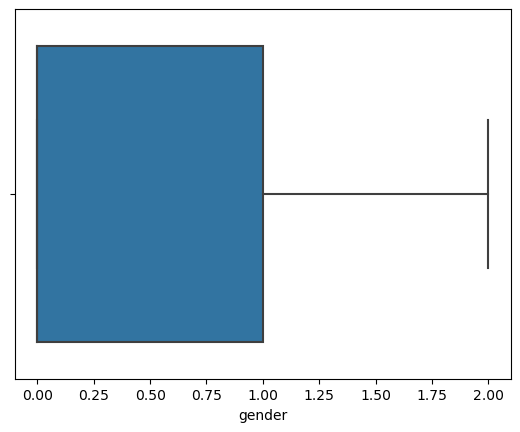

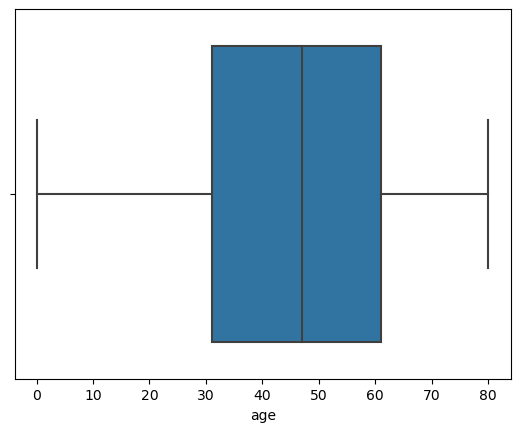

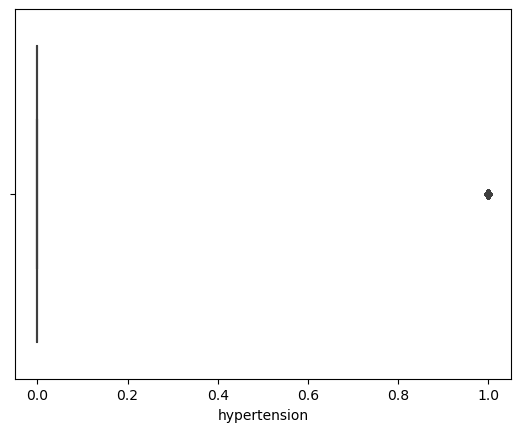

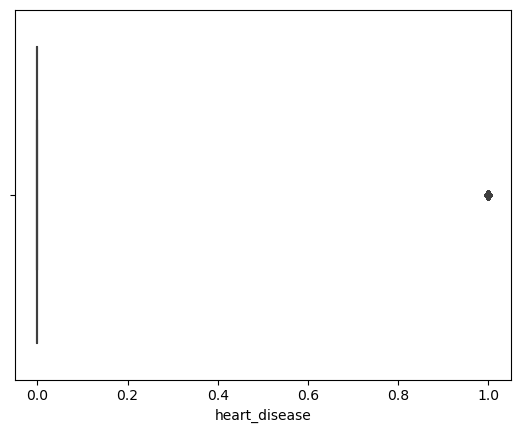

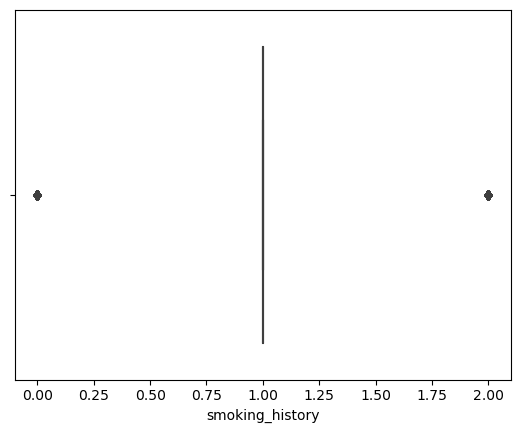

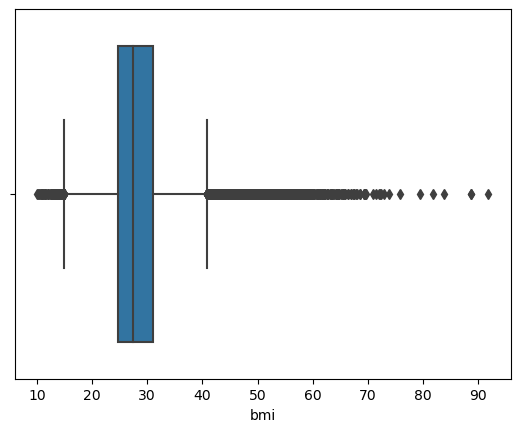

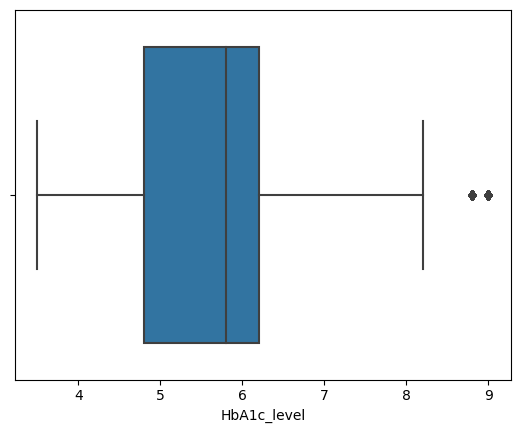

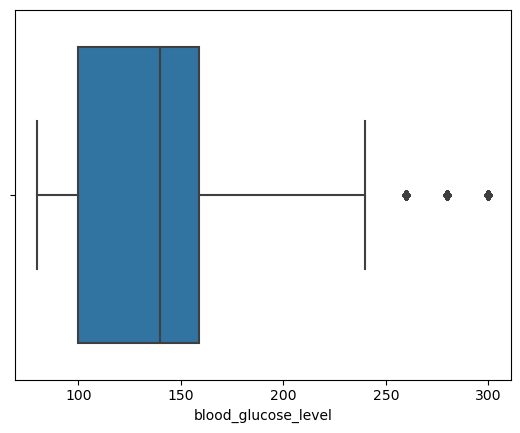

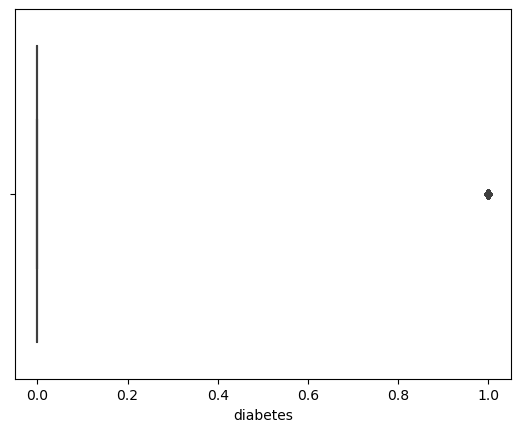

In [14]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

# Removing Outliers

In [15]:
def wisker(col):
    q1 , q3 = np.percentile(col , [25,75])
    iqr=q3-q1
    lw=q1-(1.5*iqr)
    uw=q3+(1.5*iqr)
    return lw,uw

In [16]:
for i in['age', 'bmi','HbA1c_level', 'blood_glucose_level', 'gender']:
       lw,uw=wisker(df[i])
       df[i]=np.where(df[i]>uw,uw,df[i])
       df[i]=np.where(df[i]<lw,lw,df[i])

C:\Users\acer\AppData\Local\Temp\ipykernel_12676\936834323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=np.where(df[i]>uw,uw,df[i])
C:\Users\acer\AppData\Local\Temp\ipykernel_12676\936834323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=np.where(df[i]<lw,lw,df[i])


# Data Visualization

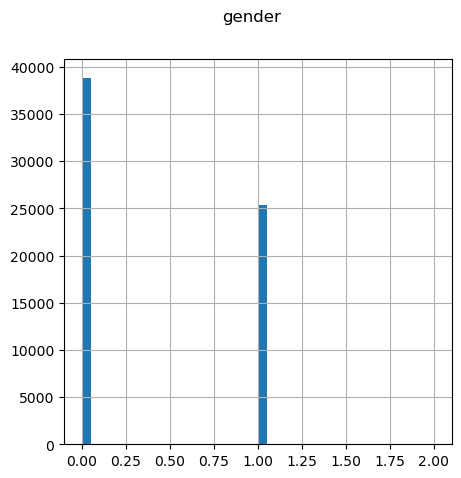

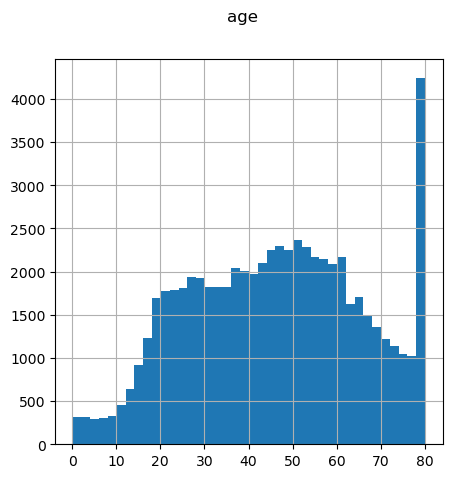

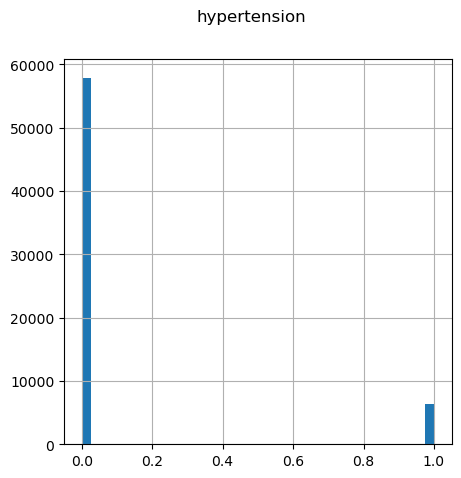

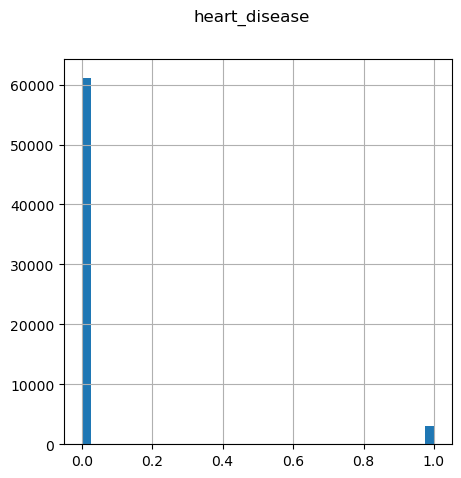

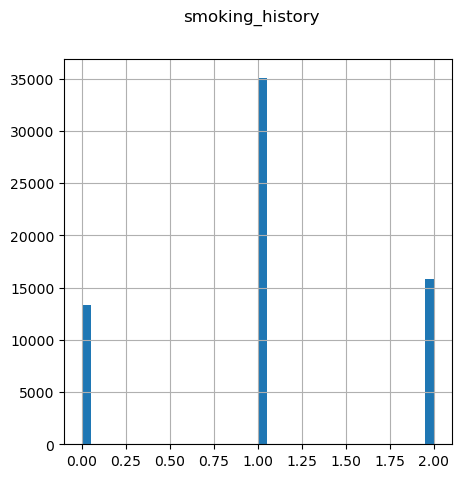

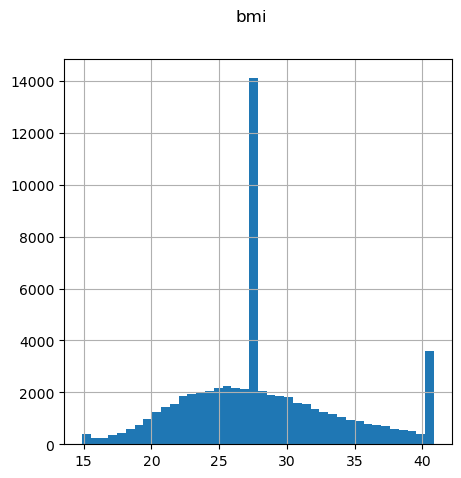

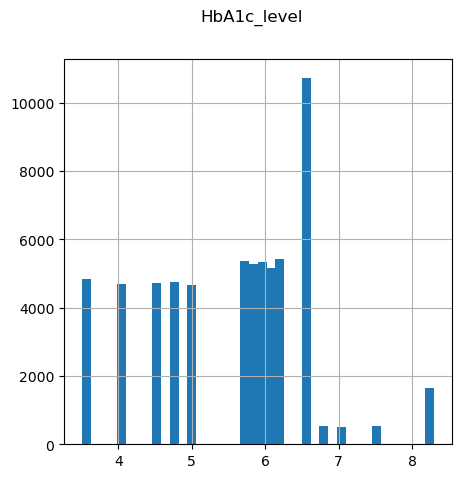

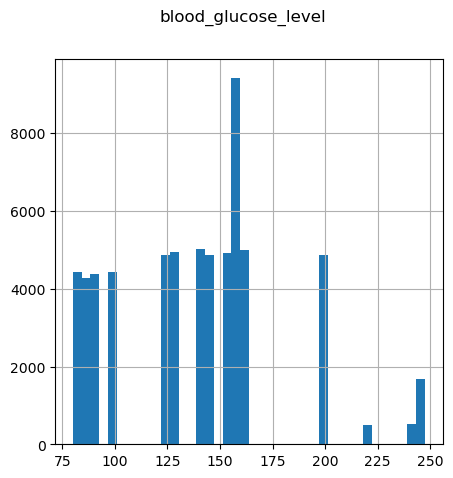

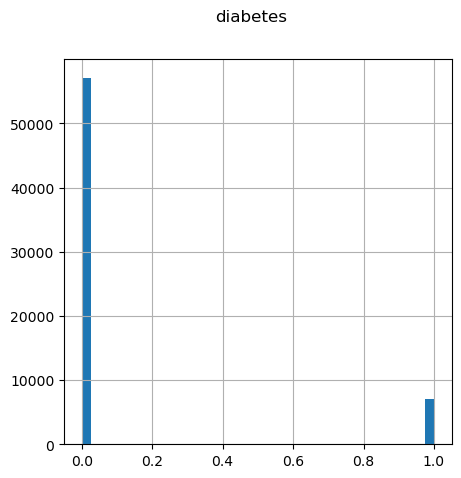

In [17]:
for i in df.columns:
    df[i].hist(bins=40, figsize=(5,5))
    plt.suptitle(i)
    plt.show()

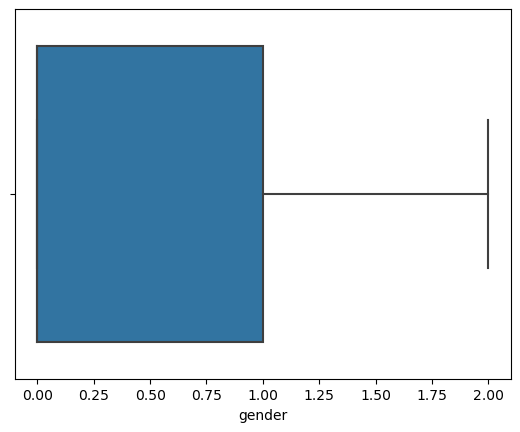

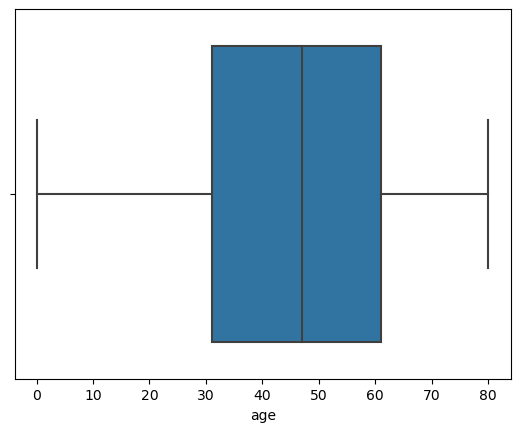

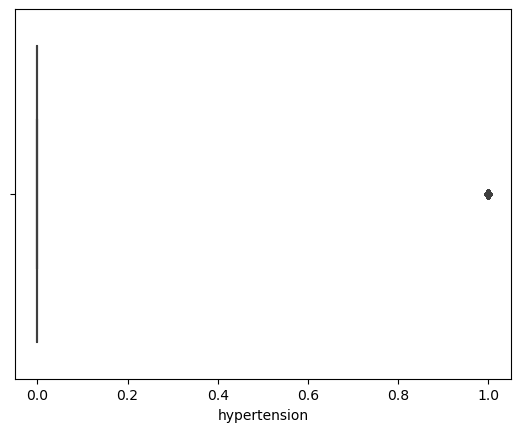

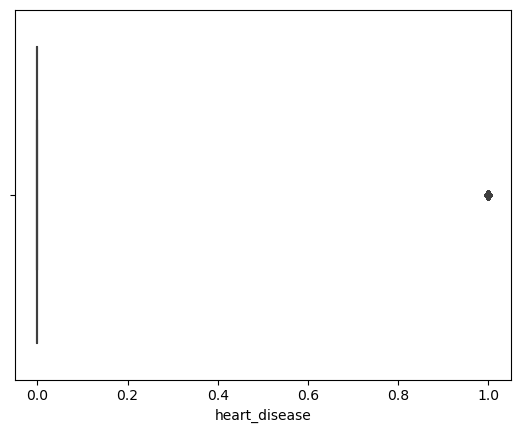

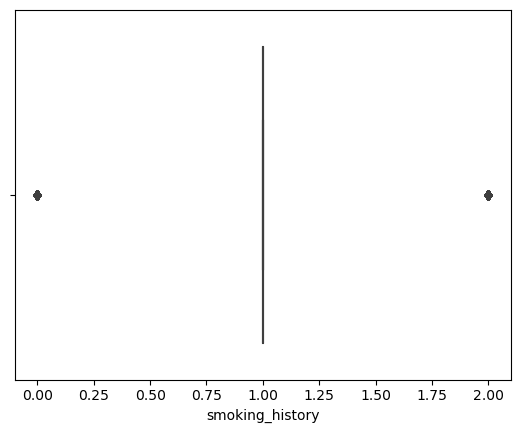

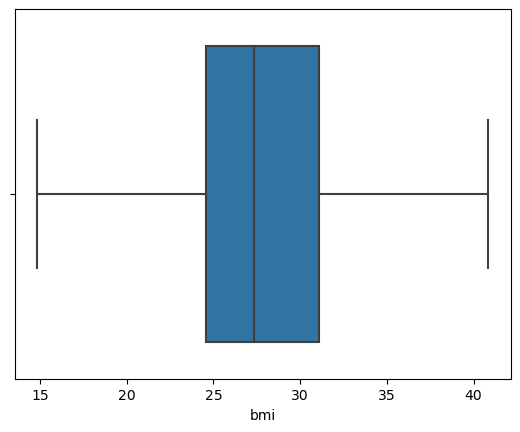

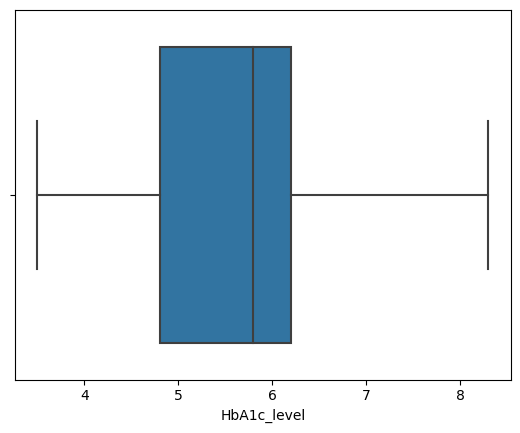

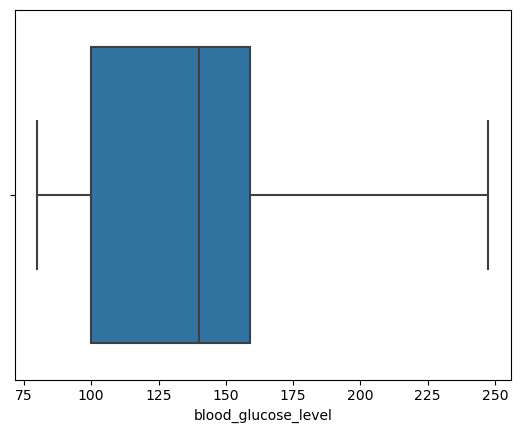

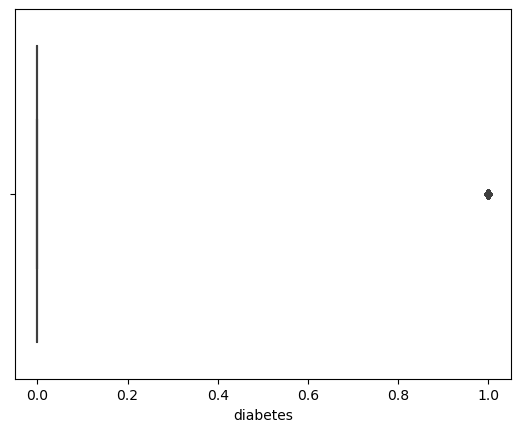

In [18]:
import warnings
warnings.filterwarnings('ignore')
for i in df.columns:
  sns.boxplot(data=df, x=i)
  plt.show()

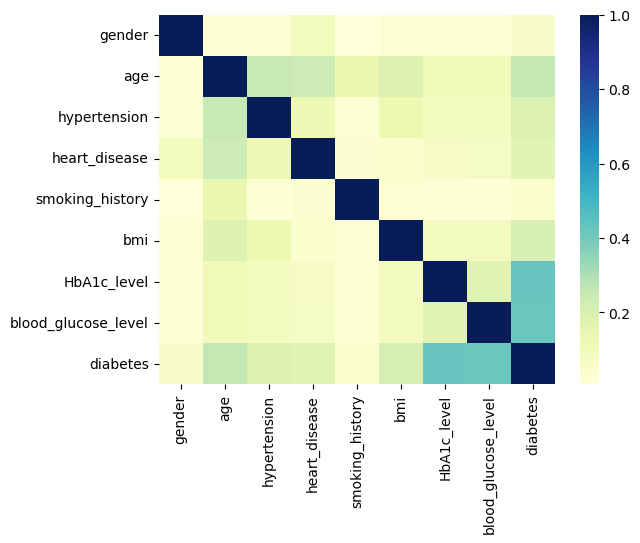

In [19]:
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu')
plt.show()

In [20]:
x=df.drop("diabetes",axis=1)
y=df['diabetes']

# Feature Extraction

In [21]:
print(x)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0         0.0  80.0             0              1                1  25.19   
2         1.0  28.0             0              0                1  27.32   
3         0.0  36.0             0              0                0  23.45   
4         1.0  76.0             1              1                0  20.14   
5         0.0  20.0             0              0                1  27.32   
...       ...   ...           ...            ...              ...    ...   
99992     0.0  26.0             0              0                1  34.34   
99993     0.0  40.0             0              0                1  40.69   
99997     1.0  66.0             0              0                2  27.83   
99998     0.0  24.0             0              0                1  35.42   
99999     0.0  57.0             0              0                0  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                140.0  
2  

# Target Variable Selection

In [22]:
print(y)

0        0
2        0
3        0
4        0
5        0
        ..
99992    0
99993    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 64184, dtype: int64


# Splitting the Dataset

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Evaluation

In [25]:
y_pred=model.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, f1_score

In [27]:
#accuracy of test data
print("Acccuracy Score of Train Dataset", accuracy_score(y_test, y_pred)*100)

Acccuracy Score of Train Dataset 93.8926540468957


In [32]:
y_pred=model.predict(x_train)

In [37]:
#accuracy of train data
print("Acccuracy Score of Train Dataset", accuracy_score(y_train, y_pred)*100) #train ki accuracy

Acccuracy Score of Train Dataset 94.38720860030772


In [38]:
y_pred=model.predict(x_test)

In [40]:
print("F1 Score of Train Dataset", f1_score(y_test, y_pred)*100)

F1 Score of Train Dataset 68.23338735818476


In [41]:
y_pred1=model.predict(x_train)

In [43]:
print("F1 Score of Train Dataset", f1_score(y_train, y_pred1)*100)

F1 Score of Train Dataset 70.57982850142916


In [44]:
model.predict([[0,80,0,1,0,25.19,6.6,140]])

array([1], dtype=int64)

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))